In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Student_performance_data.csv')

# Data pre-processing

In [3]:
df.drop(columns=['StudentID'], inplace=True)

In [4]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [5]:
def classifier(pred):
    if pred >= 3.5:
        return 0
    if pred >= 3:
        return 1
    if pred >= 2.5:
        return 2
    if pred >= 2:
        return 3
    return 4

In [6]:
df['GradeClass'] = [classifier(p) for p in df['GPA']]

In [7]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,4
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,4


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


# Visualization

<Axes: xlabel='GradeClass', ylabel='count'>

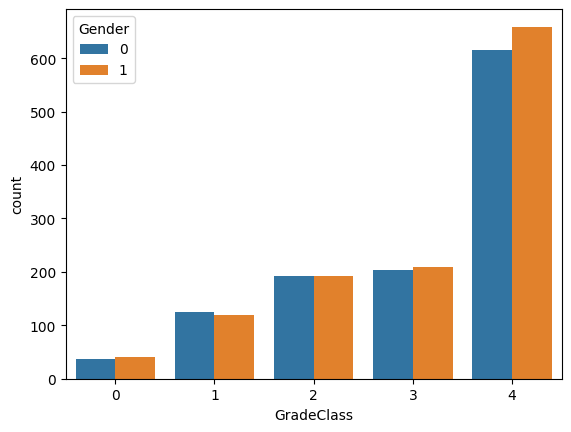

In [9]:
sb.countplot(x="GradeClass", hue="Gender", data=df)

<Axes: xlabel='GradeClass', ylabel='count'>

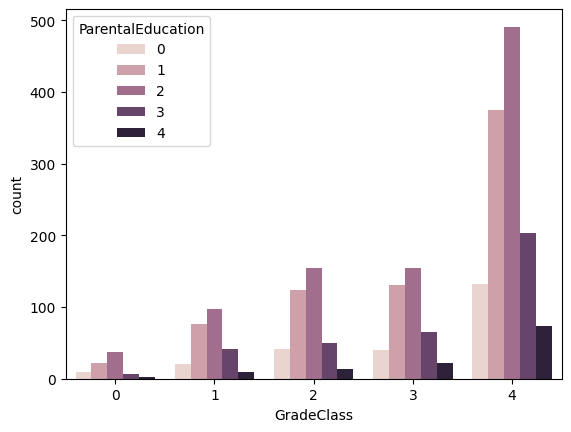

In [10]:
sb.countplot(x="GradeClass", hue="ParentalEducation", data=df)

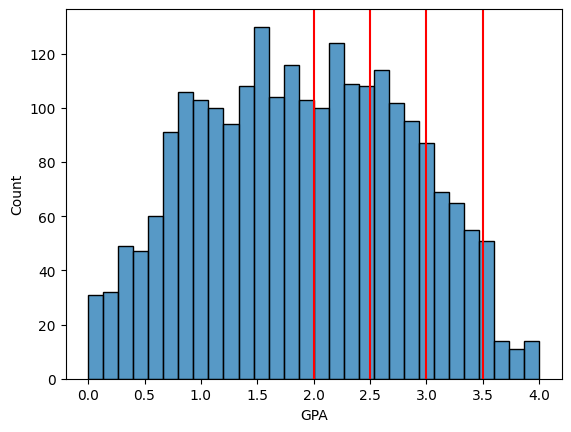

In [11]:
sb.histplot(x='GPA', bins=30, data=df)
plt.axvline(3.5,0,125, color='red')
plt.axvline(3,0,125, color='red')
plt.axvline(2.5,0,125, color='red')
plt.axvline(2,0,125, color='red')

<Axes: xlabel='GradeClass', ylabel='count'>

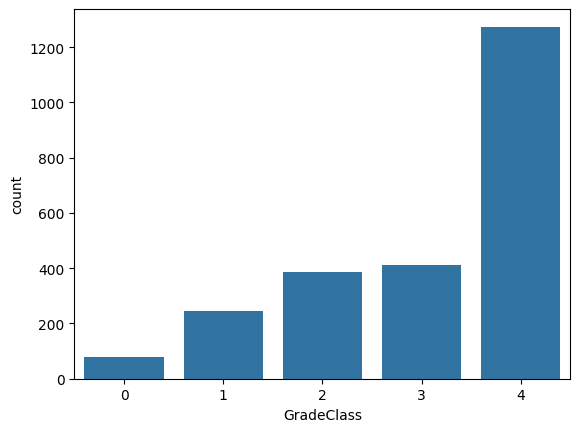

In [12]:
sb.countplot(x='GradeClass', data=df)

In [13]:
X = df[df.columns.values[:-2]]

In [14]:
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0


# Classifying Grade Class with RandomForest

In [15]:
y = df[['GradeClass']]

In [16]:
y

,GradeClass
0,2
1,1
2,4
3,3
4,4
...,...
2387,1
2388,1
2389,4
2390,4


In [17]:
x_train , x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier()

In [18]:
model.fit(x_train, y_train.values.ravel())

pred = model.predict(x_test)
accuracy_score(pred, y_test)

0.7599164926931107

# Feature importance

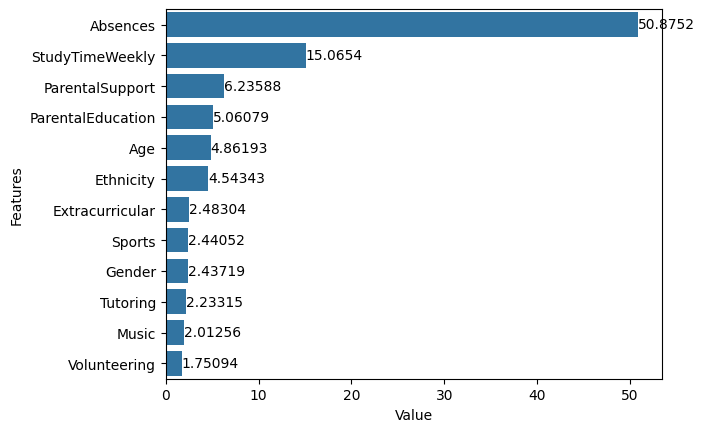

In [19]:
feats = df.columns.values[:-2]

def plot_feats_importance(model, feats):
    feat_imp = pd.DataFrame({'Value': 100 * model.feature_importances_, 'Features': feats})
    feat_imp.sort_values(by='Value', ascending=False, inplace=True)
    ax = sb.barplot(x='Value', y='Features', data=feat_imp, legend='full')
    ax.bar_label(ax.containers[0])
    
plot_feats_importance(model, feats)

# Model Tuning

In [20]:
model_base = RandomForestClassifier()

tuned_params = {'n_estimators': [100, 200, 500, 1000], 
                'max_features': [3,5,8,'log2','sqrt'], 
                'criterion': ['entropy', 'gini', 'log_loss']}

In [21]:
model_tuned = GridSearchCV(model_base, tuned_params,n_jobs=-1, verbose=2)
model_tuned.fit(x_train, y_train.values.ravel())
print(model_tuned.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'criterion': 'log_loss', 'max_features': 5, 'n_estimators': 500}


In [22]:
best_pred = model_tuned.predict(x_test)
accuracy_score(best_pred, y_test)

0.7766179540709812

In [23]:
best_params = model_tuned.best_params_

best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                    max_features=best_params['max_features'], 
                                    criterion=best_params['criterion'])

best_model.fit(x_train, y_train.values.ravel())
best_pred = model_tuned.predict(x_test)
accuracy_score(best_pred, y_test)

0.7766179540709812

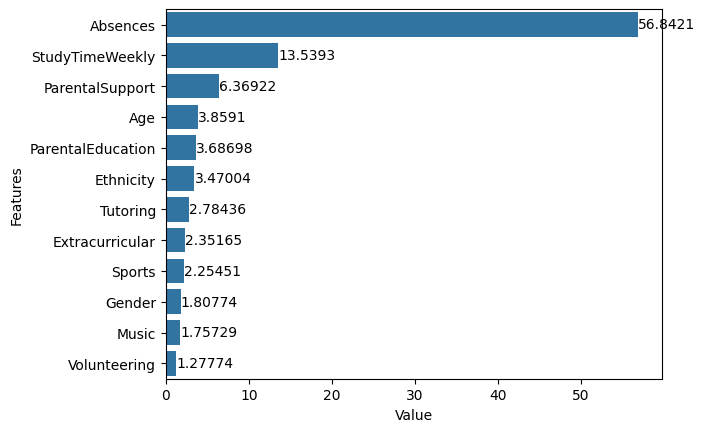

In [24]:
plot_feats_importance(best_model, feats)

# Linear Regression on GPA to predict Grade Class

In [25]:
def MSE(preds, targets):
    return ((preds - targets)**2).sum()/preds.shape[0]

In [26]:
x_train

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
1512,15,0,2,1,4.459000,27,0,1,0,0,0,0
227,16,0,0,2,8.090390,27,0,3,0,1,0,0
657,17,1,0,1,17.531210,25,1,3,0,0,0,0
412,16,0,1,2,10.437246,19,1,1,1,1,1,0
1233,15,1,0,2,7.599199,22,0,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1785,18,0,2,2,10.390037,15,1,4,0,1,0,1
439,17,1,1,1,8.968157,4,0,2,1,0,1,0
1243,17,1,0,1,2.997256,28,0,3,1,1,0,0
1687,15,0,0,3,12.312488,5,0,2,0,0,1,0


In [27]:
y_reg = df[['GPA']]

model_reg = LinearRegression()

y_reg_train, y_reg_test = y_reg.values[y_train.index.values], y_reg.values[y_test.index.values]

In [28]:
model_reg.fit(x_train, y_reg_train)
preds = model_reg.predict(x_test)

In [29]:
comp = pd.DataFrame(y_reg_test)
comp['preds'] = preds
comp

,0,preds
0,0.655954,0.893521
1,1.415221,1.657474
2,1.819511,1.825625
3,1.538689,1.765742
4,2.639447,2.529696
...,...,...
474,0.286571,0.586931
475,3.060491,3.265648
476,1.041029,0.901066
477,2.256488,2.126681


In [30]:
print(MSE(np.array(preds), y_reg_test))

0.03692632899918916


In [31]:
classed = np.array([classifier(p) for p in preds])
accuracy_score(classed,y_test)

0.8204592901878914